In [340]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data from pynpcf

In [526]:
d = np.load('/home/ophilcox/pynpcf/outputs/test100_3PCF_n11.npz')
r1,r2 = d.f.bin_centers.T
zeta3py = d.f.zeta
d.close()

### Load data from NPCF-Estimator

In [527]:
bin1,bin2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=4,max_rows=2).astype(int)
d2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=7)
ells = d2[:,0].astype(int)
zeta3cpp = d2[:,1:]

### Plot

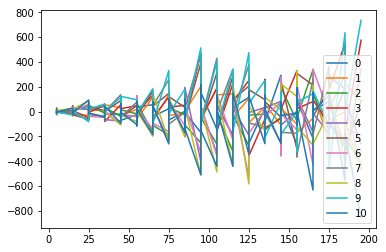

In [528]:
for ell in ells:
    plt.plot(r1,zeta3py[ell],label=ell);
plt.legend();
#plt.yscale('log')
#plt.ylim([-2000,2000])
#plt.ylim([-200000,200000])

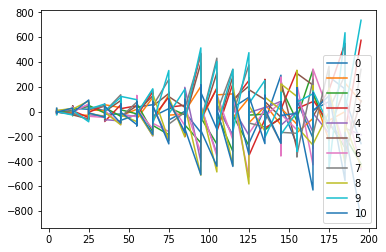

In [529]:
for ell in ells:
    plt.plot(r1,zeta3cpp[ell],label=ell);
plt.legend();

In [530]:
len(zeta3py[0])

210

In [531]:
n_bin = len(np.unique(r1))
n_ell = len(ells)
zeta3py_mat = np.zeros((len(ells),n_bin,n_bin))
zeta3cpp_mat = np.zeros((len(ells),n_bin,n_bin))
for ell in range(n_ell):
    i = 0
    for i in range(len(bin1)):
        zeta3py_mat[ell,bin1[i],bin2[i]] = zeta3py[ell,i]
        zeta3cpp_mat[ell,bin1[i],bin2[i]] = zeta3cpp[ell,i]

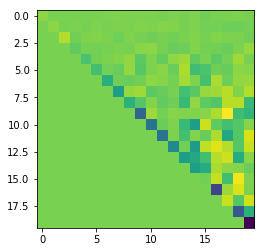

In [532]:
plt.imshow(zeta3cpp_mat[10])

In [533]:
zeta3py_mat.shape

(11, 20, 20)

/home/ophilcox/.conda/envs/ptenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


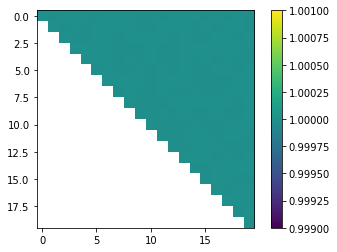

In [538]:
ell = 1
plt.imshow(zeta3py_mat[ell]/zeta3cpp_mat[ell],vmax=1.001,vmin=0.999)
plt.colorbar();

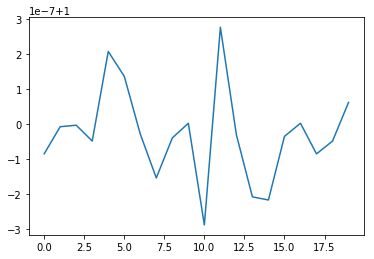

In [535]:
ell = 9
i = np.unique(bin2)[-1]
plt.plot(bin1[bin2==i],zeta3py[ell][bin2==i]/zeta3cpp[ell][bin2==i])

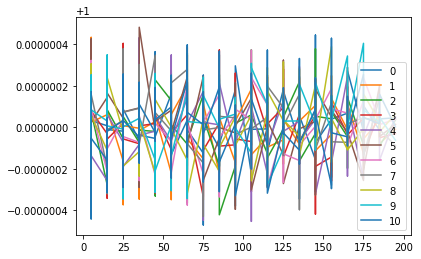

In [536]:
for ell in range(len(ells)):
    plt.plot(r1,zeta3cpp[ell]/zeta3py[ell],label=ell)
plt.legend();